In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
all_df = pd.read_csv('train.csv')

# Split the data into training (70%) and testing (30%) sets
train_df, test_df = train_test_split(all_df, test_size=0.3, random_state=42)

# Display the shapes of the two datasets
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (1022, 81)
Test DataFrame shape: (438, 81)


In [14]:
#Find average relative error

def getPrediction(year, shift, intercept, mult, degree):
    return pow(mult*(year+shift), degree)+intercept

def getRelativeError(prediction, actual):
    return abs(prediction-actual) / actual * 100

def getAccuracy(df, shift, intercept, mult, degree):
    #Gather the average relative errora
    averageRelErrors = []
    for i in range(len(df['SalePrice'])):
        SalePrice = df.iloc[i]['SalePrice']
        OverallQual = df.iloc[i]['OverallQual']
        prediction = getPrediction(OverallQual, shift, intercept, mult, degree)
        relativeError = getRelativeError(prediction, SalePrice)
        #print("Prediction: "+str(prediction)+" Actual: "+str(SalePrice)+" Relative Error: "+str(relativeError)+"%")
        averageRelErrors.append(relativeError)
    return sum(averageRelErrors) / len(averageRelErrors)

def getRMSEAccuracy(df, shift, intercept, mult, degree):
    squared_errors = 0

    for i in range(len(df['SalePrice'])):
        SalePrice = df.iloc[i]['SalePrice']
        OverallQual = df.iloc[i]['OverallQual']
        prediction = getPrediction(OverallQual, shift, intercept, mult, degree)

        # Calculate squared error
        squared_errors += (prediction - SalePrice)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df['SalePrice'])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse


In [4]:
bestValue = [10000, 0, 0]
for i in range(200):
    degree = 6.1355+(i/10000)
    print("running Degree "+str(i)+"/200")
    for i in range(3):
        mult = 1+(i/100)
        accuracy = getAccuracy(train_df, 0, 0, mult, degree)
        if bestValue[0] > accuracy:
            bestValue = [accuracy, mult, degree]
    print("Ran Degree : "+"Best Equation: "+str(bestValue))

print("Best Equation: "+str(bestValue))

running Degree 0/200
Ran Degree : Best Equation: [62.935169134836045, 1.01, 6.1355]
running Degree 1/200
Ran Degree : Best Equation: [62.935169134836045, 1.01, 6.1355]
running Degree 2/200
Ran Degree : Best Equation: [62.935169134836045, 1.01, 6.1355]
running Degree 3/200
Ran Degree : Best Equation: [62.935169134836045, 1.01, 6.1355]
running Degree 4/200
Ran Degree : Best Equation: [62.935169134836045, 1.01, 6.1355]
running Degree 5/200
Ran Degree : Best Equation: [62.935169134836045, 1.01, 6.1355]
running Degree 6/200


KeyboardInterrupt: 

In [17]:
getRMSEAccuracy(train_df, 0, 0, 1, 6.1355)

153082.02814967796

In [18]:
getRMSEAccuracy(train_df, 0, 50000, 4000, 2)

C:\Users\greyes11\AppData\Local\Temp\ipykernel_4364\1171829294.py:30: RuntimeWarning: overflow encountered in longlong_scalars
  squared_errors += (prediction - SalePrice)**2


71567047.36514665

   OverallQual          RMSE
0          2.0  6.400235e+07
1          3.0  1.439590e+08
2          4.0  2.559406e+08
3          5.0  3.999174e+08
4          6.0  5.758896e+08
5          7.0  7.838390e+08
6          8.0  1.023774e+09
7          9.0  1.295656e+09
8         10.0  1.599610e+09


<AxesSubplot:xlabel='OverallQual', ylabel='RMSE'>

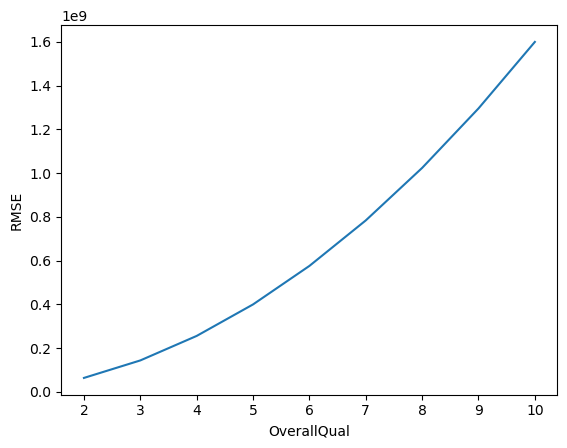

In [20]:
RMSEData = {
    "OverallQual": [],
    "RMSE": []
}
RMSE_df = pd.DataFrame(RMSEData)

# Assuming you have a DataFrame called test_df
for i in range(len(test_df['OverallQual'])):
    OverallQual = test_df.iloc[i]['OverallQual']
    SalePrice = test_df.iloc[i]["SalePrice"]
    prediction = getPrediction(OverallQual, 0, 50000, 4000, 2)

    # Calculate squared error
    squared_error = (prediction - SalePrice)**2

    # Append the squared error to the RMSE_df DataFrame
    new_row = {'OverallQual': OverallQual, "RMSE": squared_error}
    RMSE_df = pd.concat([RMSE_df, pd.DataFrame([new_row])], ignore_index=True)

# Group by 'OverallQual' and calculate the mean of squared errors
RMSE_df = RMSE_df.groupby('OverallQual')['RMSE'].mean().reset_index()

# Calculate root mean squared error
RMSE_df['RMSE'] = np.sqrt(RMSE_df['RMSE'])

# Display the resulting DataFrame
print(RMSE_df)
sns.lineplot(data=RMSE_df, x="OverallQual", y="RMSE")

   OverallQual           RMSE
0          2.0   49160.326691
1          3.0   91950.876254
2          4.0  108125.210918
3          5.0  116520.336757
4          6.0  106163.481315
5          7.0   73161.324123
6          8.0   93838.723157
7          9.0  335981.751703
8         10.0  936481.648718


<AxesSubplot:xlabel='OverallQual', ylabel='RMSE'>

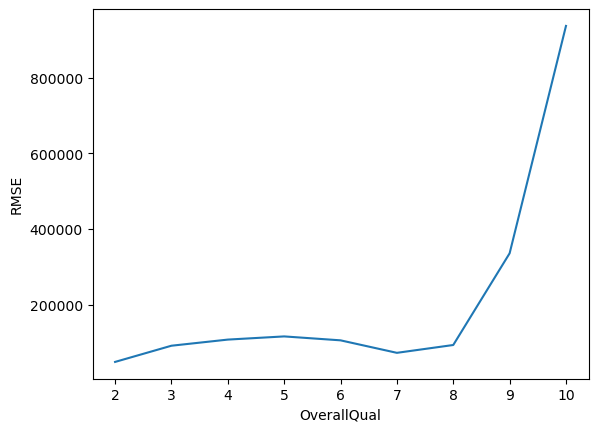

In [21]:
RMSEData = {
    "OverallQual": [],
    "RMSE": []
}
RMSE_df = pd.DataFrame(RMSEData)

# Assuming you have a DataFrame called test_df
for i in range(len(test_df['OverallQual'])):
    OverallQual = test_df.iloc[i]['OverallQual']
    SalePrice = test_df.iloc[i]["SalePrice"]
    prediction = getPrediction(OverallQual, 0, 0, 1, 6.1355)

    # Calculate squared error
    squared_error = (prediction - SalePrice)**2

    # Append the squared error to the RMSE_df DataFrame
    new_row = {'OverallQual': OverallQual, "RMSE": squared_error}
    RMSE_df = pd.concat([RMSE_df, pd.DataFrame([new_row])], ignore_index=True)

# Group by 'OverallQual' and calculate the mean of squared errors
RMSE_df = RMSE_df.groupby('OverallQual')['RMSE'].mean().reset_index()

# Calculate root mean squared error
RMSE_df['RMSE'] = np.sqrt(RMSE_df['RMSE'])

# Display the resulting DataFrame
print(RMSE_df)
sns.lineplot(data=RMSE_df, x="OverallQual", y="RMSE")

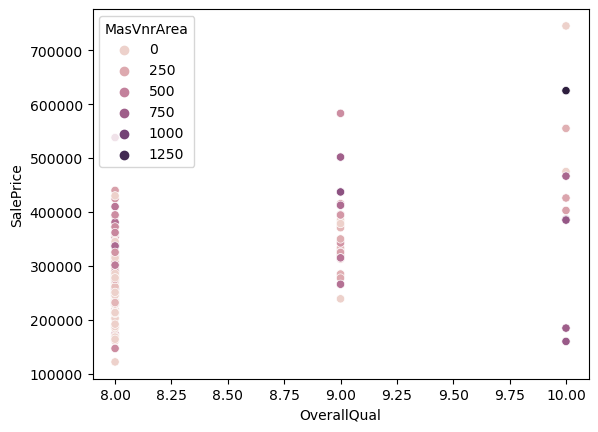

In [24]:
subset_df = train_df[(train_df['OverallQual'] >= 8) & (train_df['OverallQual'] <= 10)]



# Plot the scatter plot for the specified range on the x-axis
sns.scatterplot(data=subset_df, x="OverallQual", y="SalePrice", hue="MasVnrArea")

# Show the plot
plt.show()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.079898,-0.121952,-0.060252,NaN,0.042089,-0.069956,-0.101212,0.034273,-0.023063,...,0.001104,-0.014220,-0.075537,0.174123,-0.122158,-0.109512,-0.038774,-0.046013,0.091785,-0.027334
MSSubClass,-0.079898,1.000000,-0.495072,-0.326884,NaN,0.017539,-0.157222,-0.227848,-0.214910,0.068910,...,-0.072924,-0.196153,0.078616,-0.008876,0.186218,0.049115,-0.093244,0.074460,0.038545,-0.238498
LotFrontage,-0.121952,-0.495072,1.000000,0.345894,NaN,0.129629,-0.164739,0.000169,0.128050,-0.130317,...,-0.117951,0.037356,0.332461,0.040825,-0.201519,0.398432,NaN,-0.144212,-0.155073,0.061209
LotArea,-0.060252,-0.326884,0.345894,1.000000,NaN,0.041851,-0.079471,-0.044647,0.268556,0.108024,...,0.232601,0.052922,0.166343,-0.021596,0.171451,0.251357,0.006290,-0.160338,0.017674,0.475538
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,0.042089,0.017539,0.129629,0.041851,NaN,1.000000,-0.570662,-0.282506,-0.087290,-0.036718,...,0.030198,0.021719,-0.143877,-0.038808,-0.057317,-0.138621,-0.028804,0.052765,0.123143,0.021079
YearBuilt,-0.069956,-0.157222,-0.164739,-0.079471,NaN,-0.570662,1.000000,0.624346,0.197450,0.051501,...,0.098020,0.065539,-0.278538,0.066567,0.014752,-0.303783,0.021938,-0.074464,0.009510,0.199419
YearRemodAdd,-0.101212,-0.227848,0.000169,-0.044647,NaN,-0.282506,0.624346,1.000000,0.130222,0.005145,...,-0.053299,0.034836,-0.180588,0.099167,-0.150103,-0.120903,0.008769,0.014969,0.072279,0.189651
MasVnrArea,0.034273,-0.214910,0.128050,0.268556,NaN,-0.087290,0.197450,0.130222,1.000000,0.078940,...,0.264049,-0.045675,-0.156376,0.067244,0.086352,-0.087612,0.102964,-0.072310,-0.077431,0.360535
BsmtFinSF1,-0.023063,0.068910,-0.130317,0.108024,NaN,-0.036718,0.051501,0.005145,0.078940,1.000000,...,0.165622,-0.039356,0.104700,0.190606,0.167740,0.083259,0.137092,0.010949,0.159704,0.452382


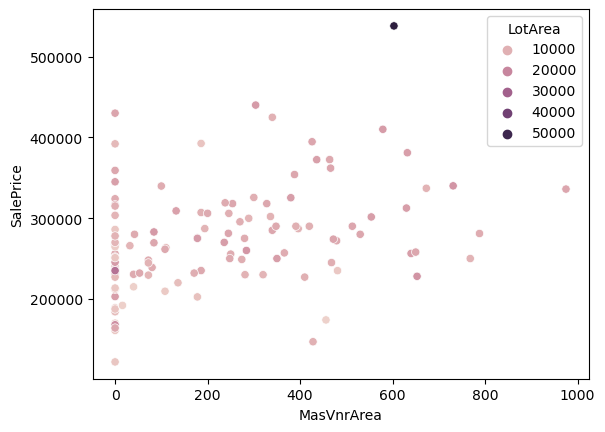

In [27]:
subset_df = train_df[train_df['OverallQual'] == 8]

# Plot the scatter plot
sns.scatterplot(data=subset_df, x="MasVnrArea", y="SalePrice",hue="LotArea")

# Show the plot
subset_df.corr()

In [23]:
subset_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.109473,0.048330,-0.021206,-0.042781,0.022605,-0.029487,-0.088509,-0.008998,0.035537,...,0.001540,0.008535,-0.059906,0.155438,-0.143799,0.057238,-0.030556,-0.035815,0.113459,-0.035965
MSSubClass,-0.109473,1.000000,-0.344751,-0.234958,-0.136361,0.073304,-0.176334,-0.246693,-0.171041,-0.036913,...,-0.089397,-0.134941,0.080366,0.000884,0.149107,0.046566,-0.075452,0.050390,-0.007008,-0.229653
LotFrontage,0.048330,-0.344751,1.000000,0.558430,0.385189,0.039536,-0.055471,0.059005,0.227031,0.352835,...,0.039556,0.252867,0.196611,0.006861,-0.089113,0.602994,NaN,-0.204986,-0.094304,0.111573
LotArea,-0.021206,-0.234958,0.558430,1.000000,0.389853,0.023718,-0.061773,-0.036185,0.340912,0.477283,...,0.309888,0.274825,0.073441,-0.031558,0.113266,0.386598,-0.010226,-0.116293,-0.097486,0.280584
OverallQual,-0.042781,-0.136361,0.385189,0.389853,1.000000,-0.069457,0.073078,0.166763,0.325371,0.411842,...,0.211891,0.184118,-0.075205,-0.056852,0.081275,0.234699,-0.042233,-0.192684,0.039049,0.537907
OverallCond,0.022605,0.073304,0.039536,0.023718,-0.069457,1.000000,-0.620783,-0.313621,-0.132785,-0.119624,...,-0.043777,0.105886,-0.114663,-0.026027,0.143266,-0.088624,-0.019335,0.067448,0.001591,-0.023159
YearBuilt,-0.029487,-0.176334,-0.055471,-0.061773,0.073078,-0.620783,1.000000,0.628069,0.219809,0.117912,...,0.104894,-0.006905,-0.261026,0.052667,-0.166247,-0.142298,0.014296,-0.095283,0.087522,0.123831
YearRemodAdd,-0.088509,-0.246693,0.059005,-0.036185,0.166763,-0.313621,0.628069,1.000000,0.170246,0.085001,...,-0.075214,0.043764,-0.183598,0.079865,-0.145408,-0.076073,-0.000924,-0.049891,0.143483,0.159022
MasVnrArea,-0.008998,-0.171041,0.227031,0.340912,0.325371,-0.132785,0.219809,0.170246,1.000000,0.236585,...,0.217391,0.040560,-0.140796,0.034964,-0.007403,-0.006977,0.066496,-0.153342,-0.062633,0.333625
BsmtFinSF1,0.035537,-0.036913,0.352835,0.477283,0.411842,-0.119624,0.117912,0.085001,0.236585,1.000000,...,0.173990,0.103563,0.039857,0.102298,0.004220,0.407453,0.073156,-0.069952,0.089034,0.313484


In [ ]:
# bestValue = [10000, 0, 0]
# p = 2
# for i in range(200):
#     degree = 1.468#-((i-1)/100)
#     print("running Degree "+str(i)+"/200")
#     for i in range(330):
#         mult = 1.6489-(i/pow(100, p))
#         print(mult)
#         accuracy = getAccuracy(train_df, -1960, 0, mult, degree)
#         if bestValue[0] > accuracy:
#             bestValue = [accuracy, mult, degree]
#         else:
#             p = p+1
#     print("Ran Degree : "+"Best Equation: "+str(bestValue))

# print("Best Equation: "+str(bestValue))